In [ ]:
Modeling

In this notebook, I will perform modeling using different classification methods and evaluate all models
using confusion matrix and classification matrix.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report, \
recall_score, precision_score, accuracy_score, plot_confusion_matrix, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, \
GradientBoostingClassifier,AdaBoostClassifier, VotingClassifier
from sklearn.metrics import precision_recall_curve,f1_score
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB

In [2]:
# reading(loading) the dataset

df=pd.read_csv("./datasets/final_data.csv",index_col=0)

For modeling there should not be any null values so let's check null values in our dataset.

In [3]:
# checking nulls

df.isnull().sum()

NPI                                          0
Name                                         0
city                                         0
state                                        0
specialty_description                        0
total_drug_cost                              0
total_claim_count                            0
total_day_supply                             0
Opioid Claim Count                           0
Opioid Prescribing Rate                      0
Long-Acting Opioid Claim Count               0
Long-Acting Opioid Prescribing Rate          0
Total_Payment_Sum                            0
Supplier Rental Indicator                    0
Number of Suppliers                          0
Number of Supplier Beneficiaries             0
Number of Supplier Claims                    0
Average Supplier Submitted Charge            0
Average Supplier Medicare Allow Amount       0
Average Supplier Medicare Payment Amount     0
Average Supplier Medicare Standard Amount    0
is_fraud     

You can see there is no any null values so my dataset is ready for modeling.

In [4]:
df.columns

Index(['NPI', 'Name', 'city', 'state', 'specialty_description',
       'total_drug_cost', 'total_claim_count', 'total_day_supply',
       'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate',
       'Total_Payment_Sum', 'Supplier Rental Indicator', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount', 'is_fraud'],
      dtype='object')

Checking the multi colinearity of the dataset to see which columns are positively co-related to our is_fraud column and which are the negatively co-related

In [5]:
df.corr()

,NPI,total_drug_cost,total_claim_count,total_day_supply,Opioid Claim Count,Opioid Prescribing Rate,Long-Acting Opioid Claim Count,Long-Acting Opioid Prescribing Rate,Total_Payment_Sum,Supplier Rental Indicator,Number of Suppliers,Number of Supplier Beneficiaries,Number of Supplier Claims,Average Supplier Submitted Charge,Average Supplier Medicare Allow Amount,Average Supplier Medicare Payment Amount,Average Supplier Medicare Standard Amount,is_fraud
NPI,1.000000,-0.000838,-0.001432,-0.000505,-0.000215,0.000814,-0.001643,0.001241,-0.003870,0.000169,0.001677,-0.000680,0.000086,-0.000747,-0.000453,-0.000446,-0.000458,0.002956
total_drug_cost,-0.000838,1.000000,0.537631,0.496580,0.275614,-0.147505,0.179097,0.192682,0.022279,0.264542,0.327365,0.144714,0.213662,0.159373,0.103937,0.101193,0.101160,0.004455
total_claim_count,-0.001432,0.537631,1.000000,0.912678,0.540587,-0.166710,0.270295,0.188870,-0.007571,0.457285,0.326317,0.075941,0.167013,0.158793,0.076025,0.070837,0.068083,0.006752
total_day_supply,-0.000505,0.496580,0.912678,1.000000,0.481991,-0.213925,0.211973,0.165469,-0.010239,0.419752,0.341451,0.059414,0.141373,0.140181,0.049146,0.043784,0.040875,0.004609
Opioid Claim Count,-0.000215,0.275614,0.540587,0.481991,1.000000,0.239469,0.808875,0.305827,-0.001872,0.274989,0.136726,0.017685,0.064437,0.127631,0.093340,0.090327,0.085309,0.026435
Opioid Prescribing Rate,0.000814,-0.147505,-0.166710,-0.213925,0.239469,1.000000,0.207296,0.070185,0.031551,-0.148563,-0.185242,-0.061500,-0.108470,-0.016054,0.085734,0.087861,0.087198,0.002791
Long-Acting Opioid Claim Count,-0.001643,0.179097,0.270295,0.211973,0.808875,0.207296,1.000000,0.414935,-0.001593,0.137284,0.050319,0.005226,0.028437,0.079071,0.066047,0.064694,0.060377,0.029568
Long-Acting Opioid Prescribing Rate,0.001241,0.192682,0.188870,0.165469,0.305827,0.070185,0.414935,1.000000,-0.002458,0.155218,0.035814,-0.013277,0.015487,0.045541,0.003680,0.001734,-0.000487,0.005681
Total_Payment_Sum,-0.003870,0.022279,-0.007571,-0.010239,-0.001872,0.031551,-0.001593,-0.002458,1.000000,-0.009582,0.000028,0.002989,0.000477,0.007894,0.016270,0.016383,0.016420,-0.001041
Supplier Rental Indicator,0.000169,0.264542,0.457285,0.419752,0.274989,-0.148563,0.137284,0.155218,-0.009582,1.000000,0.615698,0.361775,0.499534,0.570964,0.362529,0.353361,0.353252,-0.000758


# Pre processing steps

In [6]:
#setting up the predictors and target variable

X=df[[ 'total_drug_cost', 'total_claim_count', 'total_day_supply',
       'Opioid Claim Count', 'Opioid Prescribing Rate',
       'Long-Acting Opioid Claim Count', 'Long-Acting Opioid Prescribing Rate',
       'Total_Payment_Sum', 'Number of Suppliers',
       'Number of Supplier Beneficiaries', 'Number of Supplier Claims',
       'Average Supplier Submitted Charge',
       'Average Supplier Medicare Allow Amount',
       'Average Supplier Medicare Payment Amount',
       'Average Supplier Medicare Standard Amount',
       
       ]]
y=df["is_fraud"]

In [7]:
y.value_counts()

0    177973
1       116
Name: is_fraud, dtype: int64

In [8]:
X.shape, y.shape

((178089, 15), (178089,))

Spitting the data in training and testing sets

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  test_size = .35,
                                                    random_state=42,
                                                    stratify=y)

In [10]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((115757, 15), (62332, 15), (115757,), (62332,))

In [11]:
y_train.value_counts()

0    115682
1        75
Name: is_fraud, dtype: int64

In [12]:
y_test.value_counts()

0    62291
1       41
Name: is_fraud, dtype: int64

As we can see our target variable has highly imbalance classes so I am using SMOTE(Synthetic Minority Oversampling Technique)
which will oversample the minority class.It will not add any extra information but it will rebalance my classes


In [13]:
sm = SMOTE()
X_train, y_train = sm.fit_sample(X_train, y_train)   #resampling X_train
X_test,y_test=sm.fit_sample(X_test, y_test)          #resampling X_test

In [14]:
# checking the shape

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((231364, 15), (124582, 15), (231364,), (124582,))

In [15]:
y_train.value_counts()

1    115682
0    115682
Name: is_fraud, dtype: int64

In [16]:
# checking the class

y_test.value_counts()

1    62291
0    62291
Name: is_fraud, dtype: int64

So Now we have our y_train and y_test is with balanced class

# Logistic Regression

First, I will try logistic regression with my dataset

In [17]:
# Instantiate the model

model=LogisticRegression(max_iter=5000,solver='lbfgs')

In [18]:
# fit the model

model.fit(X_train,y_train)

LogisticRegression(max_iter=5000)

In [19]:
# predict the model

y_pred=model.predict(X_test)

In [20]:
# training score

model.score(X_train,y_train)

0.6495997648726681

In [21]:
# testing score

model.score(X_test,y_test)

0.5598722126791993

In [22]:
# predicted frauds and non-frauds

pd.Series(y_pred).value_counts()

0    90501
1    34081
dtype: int64

In [23]:
coef=model.coef_[0]


In [24]:
# probabbility of prediction

lr_probs = model.predict_proba(X_test)

In [25]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs

array([0.48910376, 0.25167646, 0.30279816, ..., 0.52779005, 0.50430649,
       0.78932436])

In [26]:
lr_probs.shape

(124582,)

In [27]:
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc 

0.5574336782293099

In [28]:
# checking the co-efficients

x=list(zip(X.columns, coef))
x

[('total_drug_cost', -3.557194255558339e-07),
 ('total_claim_count', 5.041394708934244e-05),
 ('total_day_supply', -2.7883720941150043e-06),
 ('Opioid Claim Count', 0.0026126480374719444),
 ('Opioid Prescribing Rate', -0.0012480124033904174),
 ('Long-Acting Opioid Claim Count', -0.0021924750319928187),
 ('Long-Acting Opioid Prescribing Rate', 0.00034724682062734955),
 ('Total_Payment_Sum', -2.9857838747477544e-05),
 ('Number of Suppliers', 0.0006436579895365535),
 ('Number of Supplier Beneficiaries', 0.00492155180266164),
 ('Number of Supplier Claims', -0.0018293035951619165),
 ('Average Supplier Submitted Charge', -0.00022202221164386465),
 ('Average Supplier Medicare Allow Amount', 0.00010257523515533433),
 ('Average Supplier Medicare Payment Amount', -0.0012999775984390526),
 ('Average Supplier Medicare Standard Amount', 0.0012073379495726867)]

In [29]:
# coefficients with negetive values

for i in x:
    if i[1]  < 0:
        print (i[0], i[1])

total_drug_cost -3.557194255558339e-07
total_day_supply -2.7883720941150043e-06
Opioid Prescribing Rate -0.0012480124033904174
Long-Acting Opioid Claim Count -0.0021924750319928187
Total_Payment_Sum -2.9857838747477544e-05
Number of Supplier Claims -0.0018293035951619165
Average Supplier Submitted Charge -0.00022202221164386465
Average Supplier Medicare Payment Amount -0.0012999775984390526


In [30]:
# confusion matrix

cm=confusion_matrix(y_test, y_pred)

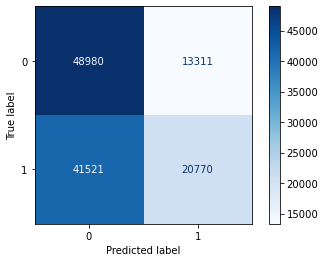

In [31]:
# plotting the confusion matrix

plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d');

In [32]:
tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 48980
True Positives: 20770
False Positives: 13311
False Negatives: 41521


Here I am detecting frauds where the false negative costs high as it is showing the fraud provider as non fraud provider 
so we will see recall and precision as our matrices

In [33]:
# recall score

recall_score(y_test, y_pred)

0.33343500666227865

In [34]:
# precision score

precision_score(y_test, y_pred)

0.6094304744579091

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.79      0.64     62291
           1       0.61      0.33      0.43     62291

    accuracy                           0.56    124582
   macro avg       0.58      0.56      0.54    124582
weighted avg       0.58      0.56      0.54    124582



In [36]:
roc_auc_score(y_test, y_pred)

0.5598722126791993

If we see the score, precision is 61% which is saying my model is 61% correctly predicting the frauds based on all information given
and recall is 33% which is saying that my model is  33% correctly indenfies the actual fraud providers.


Model has 41629 false negative which is indicating that model is predicting 41629 fraud providers as non fraud provides which 
is dangerous so let's try another classifier.

# Decision Tree Classifier

A decision tree is a managerial tool that presents all the decision alternatives and outcomes in a flowchart type of diagram, like a tree with branches and leaves. Each branch of the tree represents a decision option, its cost and the probability that it is likely to occur.

In [37]:
# Instantiate the model

dtc = DecisionTreeClassifier(max_depth = 5,
                            min_samples_split = 7,
                            min_samples_leaf = 3,
                            ccp_alpha = 0.01,
                            random_state = 42)

In [38]:
# fit the model

dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=3,
                       min_samples_split=7, random_state=42)

In [39]:
y_train.value_counts().sort_index()

0    115682
1    115682
Name: is_fraud, dtype: int64

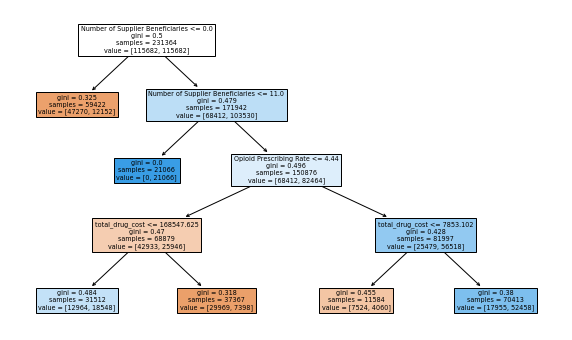

In [40]:
# plotting the decision tree

plt.figure(figsize=(10,6))
plot_tree(dtc, feature_names=X.columns, 
           filled=True);

As we can see in above tree base graph, my model is taking various decisions and moving 
to the next branches.

In [41]:
# training and testing score

print(f'Score on training set: {dtc.score(X_train, y_train)}')
print(f'Score on testing set: {dtc.score(X_test, y_test)}')

Score on training set: 0.7643151052021923
Score on testing set: 0.6433513669711516


In [42]:
# prediction of the model

preds=dtc.predict(X_test)

In [43]:
preds

array([0, 0, 0, ..., 0, 1, 1])

In [44]:
cm=confusion_matrix(y_test, # True values.
                 preds) 

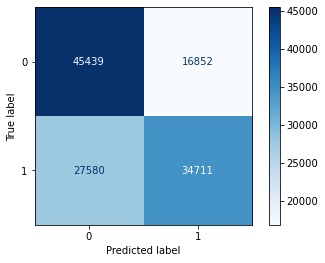

In [45]:
plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues', values_format='d');

In [46]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 45439
True Positives: 34711
False Positives: 16852
False Negatives: 27580


In [47]:
# recall score

recall_score(y_test, preds)

0.5572394085822993

In [48]:
# precision score

precision_score(y_test, preds)

0.6731765025308846

In [49]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.62      0.73      0.67     62291
           1       0.67      0.56      0.61     62291

    accuracy                           0.64    124582
   macro avg       0.65      0.64      0.64    124582
weighted avg       0.65      0.64      0.64    124582



In this Decision tree model, we reduces our false negetives compared to logistic regression model.
It was 41629 and now with decision tree it is 27578 so we improved our score.

Our precision score is saying that my model 67% correctly predict the fraud and recall score is 56% which is saying that my model is 56% correctly indenfies the actual fraud providers 

But if you see the training and testing score, there is a big gap between them which shows that 
my model is highly overfit.So let's try another classifier

# Bagging Classifier

Bagging takes the advantage of ensemble learning wherein multiple weak learner outperform a single strong learner. It helps reduce variance and thus helps us avoid overfitting.

In [50]:
# Instantiate the model

bag = BaggingClassifier(random_state = 42)

In [51]:
# Fit BaggingClassifier.
bag.fit(X_train, y_train)

# Score BaggingClassifier.
bag.score(X_test, y_test)

0.5977508789391726

In [52]:
# training score

bag.score(X_train, y_train)

0.999900589547207

In [53]:
# get the prediction

preds1=bag.predict(X_test)

In [54]:
cm=confusion_matrix(y_test, # True values.
                 preds1) 

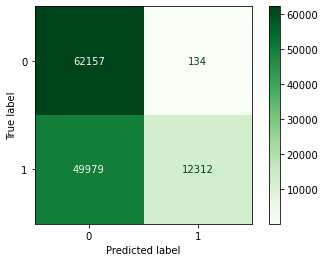

In [55]:
plot_confusion_matrix(bag, X_test, y_test, cmap='Greens', values_format='d');

In [56]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 62157
True Positives: 12312
False Positives: 134
False Negatives: 49979


In [57]:
# recall score

recall_score(y_test, preds1)

0.19765295146971473

In [58]:
# precision score

precision_score(y_test, preds1)

0.989233488671059

In [59]:
print(classification_report(y_test, preds1))

              precision    recall  f1-score   support

           0       0.55      1.00      0.71     62291
           1       0.99      0.20      0.33     62291

    accuracy                           0.60    124582
   macro avg       0.77      0.60      0.52    124582
weighted avg       0.77      0.60      0.52    124582



In this Bagging classifier model, we reduces our false positives compared to Decision tree classifier but false negetive is around 51000 which is not acceptable.
It was 27578 and now with Bagging classifier it is 50232.

Recall score is 0.19 which is saying that my model is only 19% correctly indenfies the actual fraud providers whereas the
precision score 0.98 which is saying that model is 98% correctly predict the frauds.

# Random Forest Classifier

Random forest adds additional randomness to the model, while growing the trees. Instead of searching for the most important feature while splitting a node, it searches for the best feature among a random subset of features. This results in a wide diversity that generally results in a better model

In [60]:
# Instantiate the model

rf = RandomForestClassifier(n_estimators=100)

In [61]:
# fit the model

rf.fit(X_train,y_train)

RandomForestClassifier()

In [62]:
# get the prediction

y_pred=rf.predict(X_test)

In [63]:
# training score

rf.score(X_train,y_train)

1.0

In [64]:
# testing score

rf.score(X_test,y_test)

0.5424459392207542

In [65]:
# confusion matrix

cm=confusion_matrix(y_test, # True values.
                 y_pred) 

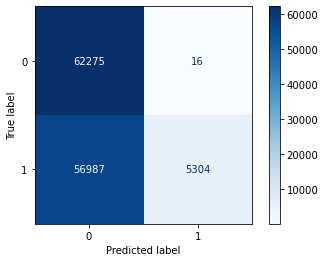

In [66]:
plot_confusion_matrix(rf, X_test, y_test, cmap='Blues', values_format='d');

In [67]:
tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 62275
True Positives: 5304
False Positives: 16
False Negatives: 56987


In [68]:
pd.Series(y_pred).value_counts()

0    119262
1      5320
dtype: int64

In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.52      1.00      0.69     62291
           1       1.00      0.09      0.16     62291

    accuracy                           0.54    124582
   macro avg       0.76      0.54      0.42    124582
weighted avg       0.76      0.54      0.42    124582



In [70]:
list(zip(X.columns, rf.feature_importances_))

[('total_drug_cost', 0.11797941985957985),
 ('total_claim_count', 0.07068611854336018),
 ('total_day_supply', 0.09152599714200864),
 ('Opioid Claim Count', 0.07862367245041195),
 ('Opioid Prescribing Rate', 0.07119249758591356),
 ('Long-Acting Opioid Claim Count', 0.05110513179518567),
 ('Long-Acting Opioid Prescribing Rate', 0.04822287721510634),
 ('Total_Payment_Sum', 0.074917470311692),
 ('Number of Suppliers', 0.051772671338154753),
 ('Number of Supplier Beneficiaries', 0.13344262813884716),
 ('Number of Supplier Claims', 0.04434229705785345),
 ('Average Supplier Submitted Charge', 0.05157660020915988),
 ('Average Supplier Medicare Allow Amount', 0.03774412857303979),
 ('Average Supplier Medicare Payment Amount', 0.03938756200162464),
 ('Average Supplier Medicare Standard Amount', 0.03748092777806207)]

Same as above, Random forest model gave me more false negetives which is not good and the 
recall and precision score are also not relevant.

# KNeighbors Classifier

KNN works by finding the distances between a query and all the examples in the data, selecting the specified number examples (K) closest to the query, then votes for the most frequent label (in the case of classification) or averages the labels (in the case of regression)

In [71]:
knn = KNeighborsClassifier( n_neighbors=5)

In [72]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [73]:
y_preds=knn.predict(X_test)

In [74]:
print("What is the baseline or prevalance in my y_test?", 1 - y_test.mean())

What is the baseline or prevalance in my y_test? 0.5


In [75]:
# confusion matrix

cm=confusion_matrix(y_test, # True values.
                 y_preds) 

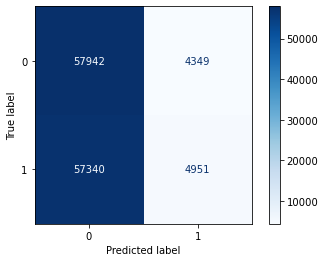

In [76]:
plot_confusion_matrix(knn, X_test, y_test, cmap='Blues', values_format='d');

In [77]:
tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 57942
True Positives: 4951
False Positives: 4349
False Negatives: 57340


Here we got 57342 false negative which is showing my model incorrectly predict 57342
non fraud providers which are fraud that is showing my model did not work well

In [78]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.50      0.93      0.65     62291
           1       0.53      0.08      0.14     62291

    accuracy                           0.50    124582
   macro avg       0.52      0.50      0.40    124582
weighted avg       0.52      0.50      0.40    124582



Recall score is 0.08 which is saying my model is 8% correctly identifying the frauds as well as the precision
score is saying that my model 53% correctly predict the frauds

# Bernoulli Naive Bayes 

A Naive Bayes classifier is a probabilistic machine learning model that’s used for classification task. The crux of the classifier is based on the Bayes theorem

In [79]:
# Instantiate the model

model=BernoulliNB()

In [80]:
# fit the model

model.fit(X_train,y_train)

BernoulliNB()

In [81]:
# train score
model.score(X_train,y_train)

0.6475337563320136

In [82]:
# test score

model.score(X_test,y_test)

0.5908638487100866

In [83]:
y_pred=model.predict(X_test)

In [84]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.72      0.64     62291
           1       0.62      0.46      0.53     62291

    accuracy                           0.59    124582
   macro avg       0.60      0.59      0.58    124582
weighted avg       0.60      0.59      0.58    124582



In [85]:
cm=confusion_matrix(y_test, # True values.
                 y_pred)

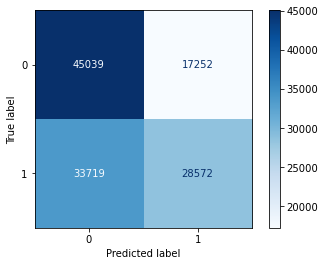

In [86]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d');

In [87]:
# recall score

recall_score(y_test, y_pred)

0.45868584546724245

In [88]:
# precision score

precision_score(y_test, y_pred)

0.6235160614525139

My model is giving recall score 0.46 which is saying my model is 46% correctly identifies the actual fraud providers and
67% correctly predict the fraud providers

# HistGradient Boosting

In [89]:
model = HistGradientBoostingClassifier()
cv = RepeatedStratifiedKFold(n_splits=15, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')


In [90]:
# model = HistGradientBoostingClassifier()
model.fit(X_train, y_train)

yhat = model.predict(X_test)


In [91]:
yhat = model.predict(X_test)

In [92]:
cm = confusion_matrix(y_test, yhat)

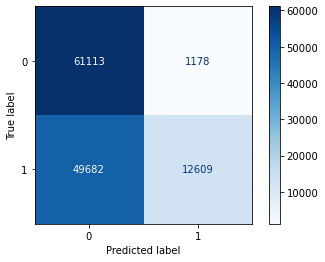

In [93]:
plot_confusion_matrix(model, X_test, y_test, cmap='Blues', values_format='d');

In [94]:

tn = cm[0,0]; print("True Negatives:", tn)
tp = cm[1,1]; print("True Positives:", tp)
fp = cm[0,1]; print("False Positives:", fp)
fn = cm[1,0]; print("False Negatives:", fn)

True Negatives: 61113
True Positives: 12609
False Positives: 1178
False Negatives: 49682


In [95]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71     62291
           1       0.91      0.20      0.33     62291

    accuracy                           0.59    124582
   macro avg       0.73      0.59      0.52    124582
weighted avg       0.73      0.59      0.52    124582



My model is giving recall score 0.24 which is saying my model is 24% correctly identifies the actual fraud providers and
98% correctly predict the fraud providers

After running all models you can see that all model gave me high number of false negatives
which is saying that my models are incorrectly predicting high numbers of non fraud peoviders which 
are actual fraud.

If I look all the models Logistic regression gave me only around 27000 false negtive with precision score 0.60 which is saying the logistic regression 60% correctly predictes the frauds.